Vamos usar os dados do MovieLens:
#https://grouplens.org/datasets/movielens/latest/

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
filmes = pd.read_csv('data/filmes/movies.csv')

In [31]:
filmes.columns =['filmeId','titulo','generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [32]:
notas = pd.read_csv('data/filmes/ratings.csv')

In [33]:
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Primeira tentativa de recomendação

In [35]:
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [36]:
filmes.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

In [37]:
filmes['total_de_votos'] = total_de_votos  # procura cruzar os indices iguais
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [38]:
filmes.sort_values('total_de_votos',ascending=False).head(10) # do maior para o menor --> quant de dados

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [39]:
notas_medias = notas.groupby('filmeId').mean()['nota']
filmes['nota_media'] = notas_medias
filmes.head()

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [40]:
filmes.head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
8,Tom and Huck (1995),Adventure|Children,8.0,2.875000
9,Sudden Death (1995),Action,16.0,3.125000


## Segunda Tentativa de recomendação - segunda Heurística

In [41]:
filmes.sort_values('nota_media',ascending=False).head(10) # do maior para o menor --> quant de dados

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [42]:
filmes.query('total_de_votos >=10').sort_values('nota_media', ascending= False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [43]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >=50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending= False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


## Terceira tentativa de recomadação

In [44]:
# sabendo que a pessoa assistiu os seguintes filmes..

eu_assisti = [1,21,19,10,11,7,2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [45]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('generos == "Adventure|Children|Fantasy" ')
aventura_infantil_e_fantasia.drop(eu_assisti,errors='ignore').sort_values('nota_media', ascending= False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


## Quarta tentativa de recomendação - por similariedade

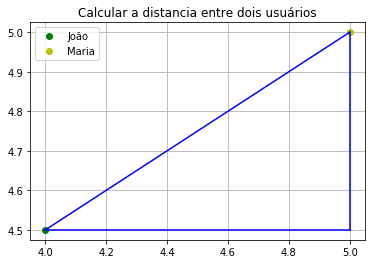

In [46]:
''' João -->  Notas:4, 4.5  
Maria --> Notas:5, 5 '''

plt.plot(4,4.5,'go')
plt.plot(5,5,'yo')
plt.legend(['João','Maria'])
plt.title('Calcular a distancia entre dois usuários')
plt.grid(True)

plt.plot([4,5],[4.5,5], color='b', linestyle='-')
plt.plot([4,5],[4.5,4.5],color='b', linestyle='-')
plt.plot([5,5],[4.5,5],color='b', linestyle='-')

In [47]:
# vamos usar o numpy

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [48]:
from math import sqrt

def pitagoras(a,b):
    (delta_x,delta_y)= a-b
    return sqrt(delta_x*delta_x + delta_y *delta_y)
    

In [49]:
pitagoras(joao,maria)

1.118033988749895

In [50]:
np.linalg.norm(joao-maria) # formula do pitagoras

1.118033988749895

In [51]:
# redefinindo a formula:

def pitagoras(a,b):
    return np.linalg.norm(a-b)

In [52]:
pitagoras(joao,maria)

1.118033988749895

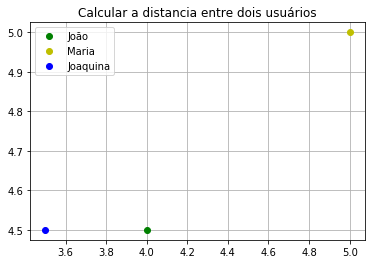

In [53]:
## Gráfico com mais notas 

plt.plot(4,4.5,'go')
plt.plot(5,5,'yo')
plt.plot(3.5,4.5,'bo')
plt.legend(['João','Maria','Joaquina'])
plt.title('Calcular a distancia entre dois usuários')
plt.grid(True)

In [54]:
joaquina=np.array([3.5,4.5])

print('__Distancia__')
print('João e Maria:',round(pitagoras(joao,maria),2))
print('João e Joaquina:',round(pitagoras(joao,joaquina),2))



__Distancia__
João e Maria: 1.12
João e Joaquina: 0.5


### Implementando o algoritimo

In [55]:
#Retorna os filmes em que 2 usuarios deram notas

def notas_do_usuario(usuario):
    notas_do_usuario = notas.query('usuarioId == %d' %usuario)
    notas_do_usuario = notas_do_usuario[['filmeId','nota']].set_index('filmeId')
    return notas_do_usuario

In [56]:
notas_do_usuario.loc[3744]

AttributeError: 'function' object has no attribute 'loc'

In [57]:
notas_do_usuario(2)

,nota
filmeId,
318,3.0
333,4.0
1704,4.5
3578,4.0
6874,4.0
8798,3.5
46970,4.0
48516,4.0
58559,4.5


In [58]:
# retorna a distancia entre os vetores

def distancia_de_vetores(a,b):
    return np.linalg.norm(a-b)

In [59]:
usuario1= notas_do_usuario(1)
usuario4= notas_do_usuario(4)

In [60]:
diferenca = usuario1.join(usuario4, lsuffix='_esquerda',rsuffix='_direita').dropna()
distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])

11.135528725660043

In [61]:
# Chamando funções dentro de funções

def distancia_de_usuarios(usuario_id1,usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferenca = notas1.join(notas2, lsuffix='_esquerda',rsuffix='_direita').dropna()
    distancia = distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])
    return [usuario_id1,usuario_id2,round(distancia,3)]

In [62]:
distancia_de_usuarios(1,4)

[1, 4, 11.136]

In [63]:
quantidade_de_usuario = len(notas['usuarioId'].unique())
print('Temos %d usuarios' %quantidade_de_usuario)

Temos 610 usuarios


## --> Duas formas diferentes de escrever o mesmo código

In [64]:
voce_id = 1

def distancia_de_todos(voce_id):
    distancias = []
    for usuario_Id in notas['usuarioId'].unique():
        informacoes = distancia_de_usuarios(voce_id,usuario_Id)
        distancias.append(informacoes)

    return distancias[:5]

In [65]:
voce_id = 1

def distancia_de_todos(voce_id):
    
    todos_os_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(voce_id,usuario_Id) for usuario_Id in todos_os_usuarios ]
    distancias = pd.DataFrame(distancias, columns=['você','outra_pessoa','distancia'])
    return distancias.head(10)

In [66]:
distancia_de_todos(2)

,você,outra_pessoa,distancia
0,2,1,1.414
1,2,2,0.000
2,2,3,0.000
3,2,4,3.500
4,2,5,0.000
5,2,6,2.236
6,2,7,4.031
7,2,8,2.000
8,2,9,0.000
9,2,10,4.950


In [67]:
notas_do_usuario(2).join(notas_do_usuario(5),lsuffix = '_2',rsuffix='_5').dropna()

,nota_2,nota_5
filmeId,,
318,3.0,3.0


In [68]:
notas_do_usuario(2).join(notas_do_usuario(3),lsuffix = '_2',rsuffix='_3').dropna()

,nota_2,nota_3
filmeId,,


## Usuários sem nada em comum são colocado distantes entre si

In [69]:
def distancia_de_usuarios(usuario_id1,usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferenca = notas1.join(notas2, lsuffix='_esquerda',rsuffix='_direita').dropna()
    
    if (len(diferenca)< minimo):
        return[usuario_id1,usuario_id2, 100000]
    
    distancia = distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])
    return [usuario_id1,usuario_id2,round(distancia,3)]



In [70]:
distancia_de_todos(2)

,você,outra_pessoa,distancia
0,2,1,100000.00
1,2,2,0.00
2,2,3,100000.00
3,2,4,100000.00
4,2,5,100000.00
5,2,6,100000.00
6,2,7,100000.00
7,2,8,100000.00
8,2,9,100000.00
9,2,10,4.95


In [71]:
def mais_proximo_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [72]:
mais_proximo_de(2)

,você,distancia
outra_pessoa,,
10,2,4.95
1,2,100000.00
3,2,100000.00
4,2,100000.00
5,2,100000.00
6,2,100000.00
7,2,100000.00
8,2,100000.00
9,2,100000.00


## Parâmetros para teste

In [73]:
def mais_proximo_de(voce_id,numero_de_usuarios_a_analisar= None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [74]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    
    todos_os_usuarios = notas['usuarioId'].unique()
    
    if n:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(voce_id,usuario_Id) for usuario_Id in todos_os_usuarios ]
    distancias = pd.DataFrame(distancias, columns=['você','outra_pessoa','distancia'])
    return distancias

In [75]:
mais_proximo_de(2,numero_de_usuarios_a_analisar=50).head(10)

NameError: name 'n' is not defined

In [76]:
def distancia_de_usuarios(usuario_id1,usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferenca = notas1.join(notas2, lsuffix='_esquerda',rsuffix='_direita').dropna()
    
    if (len(diferenca)< minimo):
        return None
    
    distancia = distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])
    return [usuario_id1,usuario_id2,round(distancia,3)]

In [77]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    
    todos_os_usuarios = notas['usuarioId'].unique()
    
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(voce_id,usuario_Id) for usuario_Id in todos_os_usuarios ]
    distancias = list(filter(None,distancias)) # ele vai retirar as linhas None
    distancias = pd.DataFrame(distancias, columns=['você','outra_pessoa','distancia'])
    return distancias

In [78]:
mais_proximo_de(2,numero_de_usuarios_a_analisar=50) # o 'n' significa --> subconjunto dos usuarios

,você,distancia
outra_pessoa,,
16,2,2.000
17,2,2.179
29,2,2.179
25,2,2.236
24,2,2.291
28,2,2.398
22,2,3.000
30,2,3.391
21,2,4.153


In [79]:
def sugere_para(voce,numero_de_usuarios_a_analisar=None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximo_de(voce,numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_de_voce =notas_do_usuario(voce)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu,errors='ignore')
    recomendacoes = notas_do_similar.sort_values('nota',ascending=False)
    return recomendacoes.join(filmes)

In [80]:
sugere_para(1, numero_de_usuarios_a_analisar=50)[:5]

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [81]:
sugere_para(1)[:5] # comparando com todos os usuários

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


## Sugerindo baseado em varios usuário:

In [84]:
def mais_proximo_de(voce_id,n_mais_proximos = 10,numero_de_usuarios_a_analisar= None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias.head(n_mais_proximos)

In [86]:
mais_proximo_de(1,numero_de_usuarios_a_analisar=300,n_mais_proximos=2)

,você,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [90]:
def sugere_para(voce,n_mais_proximos = 10 ,numero_de_usuarios_a_analisar=None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximo_de(voce,n_mais_proximos, numero_de_usuarios_a_analisar= numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
    rocomendacoes = recomendacoes.sort_values('nota',ascending=False)
    
    return recomendacoes.join(filmes)

In [93]:
sugere_para(1,10,50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1,4.500000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,4.000000,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
10,2.666667,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,4.000000,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
21,4.333333,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
